In [139]:
import pandas as pd
import numpy as np

In [140]:
df= pd.read_csv("C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\GITHUB PROJECTS\\NLP\\kaggle_movie_train.csv")
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [141]:
df.shape

(22579, 3)

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

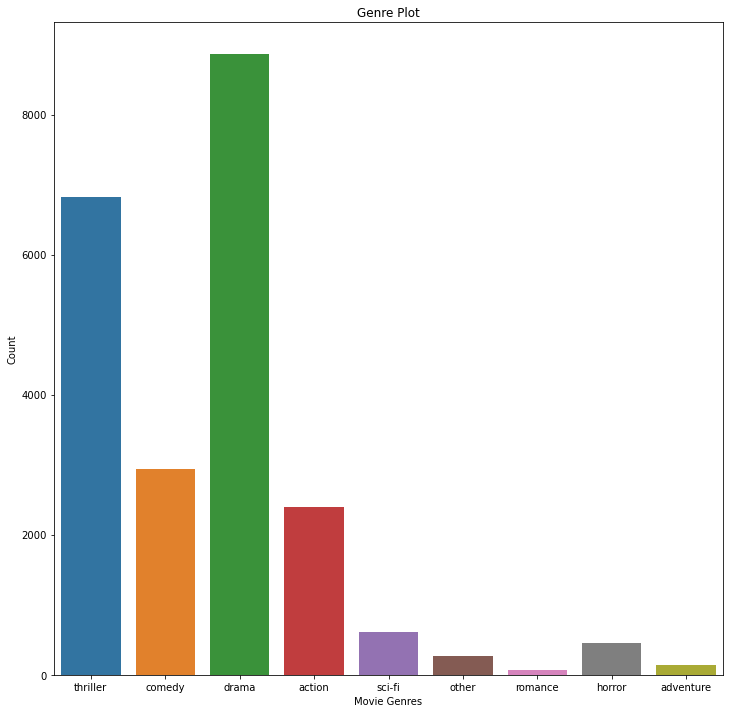

In [143]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()


In [144]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [145]:
genre_mapper={"action": 0, "adventure": 1, "comedy": 2, "drama": 3, "horror": 4, "other": 5, "romance": 6, "sci-fi": 7, "thriller": 8}
df["genre"]= df["genre"].map(genre_mapper)
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",2
2,3,"up Come, I have a surprise.... She takes him ...",3
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",3


In [146]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [147]:
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [148]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
df.shape

(22579, 2)

In [150]:
#Cleaning the text
ps= PorterStemmer()
corpus=[]
for i in range(0, df.shape[0]):
    
    dialog= re.sub(pattern="[a-zA-Z]", repl=" ", string= df["text"][i])
    dialog= dialog.lower()
    words= dialog.split()
    stop_words= [word for word in words if word not in set(stopwords.words('english'))]
    words= [ps.stem(word)for word in stop_words]
    dialog= " ".join(words)
    corpus.append(dialog)

In [151]:
corpus[1:10]

[", . ' ! , . . . ? . . . . ' . ? . . . . ' . . , , ... . . , , . ' ... ' ... . . . . ... .",
 ", .... . . , , , . . , ' . , , , . , ' . ! , . , . , , . , ... , . , . , , ,",
 ". . ' ' . . ' ' , ' . . . ' . . . , , . . . ' ' . ' . . , . . , ' , , ' . . . ' ! ,",
 ", ... ... ... ... . . . . ' . . ' , , , , . , . , . . , , , , . . , . . ' . ,",
 ". . ' . , , . , . ' . . . , . . ? ' , ' . . ? . . . . ' . . .",
 ". . ' . . . . , , . , , . ' , . . ' , . , . . ' . .",
 "! ' ' , . , ' . ' , ' . , ' , . ' ' , ! , ' . , ' ? ' , , , ' , . . ' , '",
 ", . . . , 20, ... , , , ... ' ... . ... ... . . ' . ... ... . , ... , 1996 8, ... ? ' ',",
 ". . ' ! ' ! ' ! , . . ' , . . . ' , ? . . , ? , . . . . . . ' . . , . ,"]

In [152]:
df[df["genre"]==4].index

Int64Index([  236,   241,   271,   307,   365,   376,   399,   436,   448,
              512,
            ...
            22062, 22063, 22155, 22246, 22481, 22513, 22522, 22526, 22557,
            22573],
           dtype='int64', length=456)

In [153]:
len(corpus)

22579

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [155]:
y= df["genre"].values

# Model Building

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 7538), X_test size: (4516, 7538)


Multinomial Navie Bayes

In [170]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [171]:
y_test_pred= nb_classifier.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, y_test_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 43.2%


In [160]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, y_test_pred)

In [161]:
nb_cm

array([[   9,    0,    3,  404,    0,    0,    0,    1,   59],
       [   0,    0,    0,   45,    0,    0,    0,    0,    0],
       [   1,    0,   21,  467,    0,    0,    0,    0,   70],
       [   7,    0,    5, 1679,    0,    0,    0,    1,  135],
       [   0,    0,    0,   78,    0,    0,    0,    0,    4],
       [   0,    0,    0,   64,    0,    0,    0,    0,    2],
       [   0,    0,    0,   11,    0,    0,    0,    0,    0],
       [   1,    0,    3,   74,    1,    0,    0,   10,   43],
       [   3,    0,    6, 1071,    2,    0,    0,    4,  232]],
      dtype=int64)

# Predictions

In [192]:
def genre_predictions(sample_script):
    sample_script= re.sub(pattern="[a-zA-Z]", repl=" ", string= sample_script)
    sample_script= sample_script.lower()
    sample_script_split= sample_script.split()
    sample_script_split= [word for word in sample_script_split if not word in set(stopwords.words("english"))]
    ps=PorterStemmer()
    final_script= [ps.stem(word) for word in sample_script_split]
    final_script= " ".join(final_script)
    
    temp= cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

In [193]:
#importing test data
test= pd.read_csv("C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\GITHUB PROJECTS\\NLP\\kaggle_movie_test.csv")
test.columns

Index(['id', 'text'], dtype='object')

In [194]:
test.shape

(5589, 2)

In [195]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [196]:
from random import randint

In [197]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_predictions(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: mistakes are going to land me back in Huntsville. CAROL nailing him I wouldn't worry Doc. I can always get you out... I'll screw every prison official in Texas if I have to. DOC Texas is a big state. CAROL I can handle it. DOC I'll bet you can. CAROL You'd do the same for me, wouldn't you, Doc? rising tone If I was caught, wouldn't you? Doc is silent. After a long pause. CAROL CONT'D continuing quietly When we had trouble before it was different. DOC nodding You don't like the way things are, I don't like the way things CAROL What do you want to do? DOC Maybe we should split up... I'll cut the money with you. CAROL Do you mean that? DOC I mean it. A long pause. Maybe she wonders what if he is lying but what if he isn't? Temptation? She makes up her mind. CAROL No... I don't want to leave. INT. PASSENGER TRAIN EARLY EVENING DOC AND CAROL WATCH THROUGH THE DOUBLE WINDOWS AS THE train yard lights of a town go strobing by. EXT. SECOND TRAIN CONCOURSE. DOC AND CAROL COME DOWN OUT OF

In [198]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_predictions(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  his car. BERLIN You be careful .. This man's close .. Catches her eyes. Can barely look at them. They're full of hate. MARGIE If you find him, John. I want you to call me. I wanna know his name. 153 EXT. HILLSIDE. OAKLAND. DAY. Wide over the bay area. Wind swept and rain swept. City lights beginning to come on. In the distance the docks and far beyond the ocean. Somewhere here is a solitary phone booth. I'm look ing for a special type of rattan .. friend of mine recommended you, said I should ask for someone called Amanda .. You don't? O.K. .. Thank you. Followed by sound of a phone slamming down. 154 INT. PHONE BOOTH. HILLSIDE STREET. DAY. A stack of coins and a pair of ripped out Yellow Pages. BERLIN crosses off another number. Running out of craft shops and run ning out of quarters. A new number hears the same old bullshit. But this one is answering good! Fights to keep his voice light. BERLIN Phone She's not there? Let me just make sure I got the right Amanda lotta freckle

In [199]:
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_predictions(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ying the Colours. The shot kills the ZULU and the Colours fall SLOW MOTION down, down into the river. Relieved, VEREKER' S head falls to the sandy bank. 280. The Colours float into CLOSE UP. 66 281. EXT. PULLEINE'S CAMP. ISANDHLWANA. DUSK. CHELMSFORD and his ESCORT ride into the camp. The air is full of smoke and the crackling of fire can still be heard. A dead soldier who has been tied to a post and disembowelled is CENTRE SCREEN. The wind begins to howl as CAMERA follows CHELMSFORD into the centre of the camp. He dismounts. Very slowly he removes his helmet. CLOSE UP of HARFORD. A solitary tear trickles down his cheek as he surveys the area with disbelief. Stationary, CHELMSFORD looks around him. Then very slowly and deliberately he walks forward towards the CAMERA. CAMERA PANS to reveal CREALOCK, still on horseback, in the back ground. He rides into focus. CREALOCK Excuse me, My LorJ There '5 something I must convey to you. 1 rode a little way along the track to Rorke '5 Dri